In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']= (20,10)
from datetime import date
import seaborn as sns

In [ ]:
df=pd.read_csv('HRDataset_v14.csv')

In [ ]:
year=['DateofHire','LastPerformanceReview_Date','DateofTermination']
for i in year:
  df[i]=pd.to_datetime(df[i])
  df[i]=pd.DatetimeIndex(df[i]).year

In [ ]:
df['DOB']=pd.to_datetime(df['DOB'])

In [ ]:
df['DOB']=pd.DatetimeIndex(df['DOB']).year.astype('int')

In [ ]:
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Age
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,22.0,LinkedIn,Exceeds,4.60,5,0,2019,0,1,37
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,4.0,Indeed,Fully Meets,4.96,3,6,2016,0,17,45
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,20.0,LinkedIn,Fully Meets,3.02,3,0,2012,0,3,32
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,16.0,Indeed,Fully Meets,4.84,5,0,2019,0,15,32
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,39.0,Google Search,Fully Meets,5.00,4,0,2016,0,2,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,20.0,LinkedIn,Fully Meets,4.07,4,0,2019,0,13,35
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,12.0,Google Search,PIP,3.20,2,0,2015,5,4,38
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,2.0,Employee Referral,Exceeds,4.60,5,6,2019,0,16,41
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,4.0,Employee Referral,Fully Meets,5.00,3,5,2019,0,11,41


In [ ]:
def fix_time(f):
    if f>2020:
        f=f-100
    else:
        f=f
    return f

In [ ]:
df['DOB']= df['DOB'].apply(fix_time)

In [ ]:
df['DateofTermination'].fillna(2019, inplace = True)
df['DateofTermination']= df['DateofTermination'].astype('int')

In [ ]:
df['Age']= (2020-df.DOB).astype('int')

In [ ]:
# df1 = df.copy()

In [ ]:
 df1 = df.drop(['Employee_Name', 'EmpID', 'MaritalStatusID', 'Sex', 'PositionID', 'DeptID', 'PerfScoreID', 'EmpStatusID', 'EmploymentStatus', 'DateofTermination', 'TermReason', 'ManagerID'], axis=1)

In [ ]:
table = pd.pivot_table(df, values='EmpID', index=['EmploymentStatus','Salary'],aggfunc=lambda x: len(x.unique()))
table.rename({"EmpID":"Count of Employees"},axis=1,inplace=True)
table

Count of Employees
EmploymentStatus       Salary                    
Active                 45046                    1
                       45069                    1
                       45395                    1
                       46120                    1
                       46335                    1
...                                           ...
Voluntarily Terminated 100416                   1
                       104437                   1
                       108987                   1
                       120000                   1
                       148999                   1

[309 rows x 1 columns]

In [ ]:
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Age
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,22.0,LinkedIn,Exceeds,4.60,5,0,2019,0,1,37
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,4.0,Indeed,Fully Meets,4.96,3,6,2016,0,17,45
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,20.0,LinkedIn,Fully Meets,3.02,3,0,2012,0,3,32
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,16.0,Indeed,Fully Meets,4.84,5,0,2019,0,15,32
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,39.0,Google Search,Fully Meets,5.00,4,0,2016,0,2,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,20.0,LinkedIn,Fully Meets,4.07,4,0,2019,0,13,35
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,12.0,Google Search,PIP,3.20,2,0,2015,5,4,38
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,2.0,Employee Referral,Exceeds,4.60,5,6,2019,0,16,41
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,4.0,Employee Referral,Fully Meets,5.00,3,5,2019,0,11,41


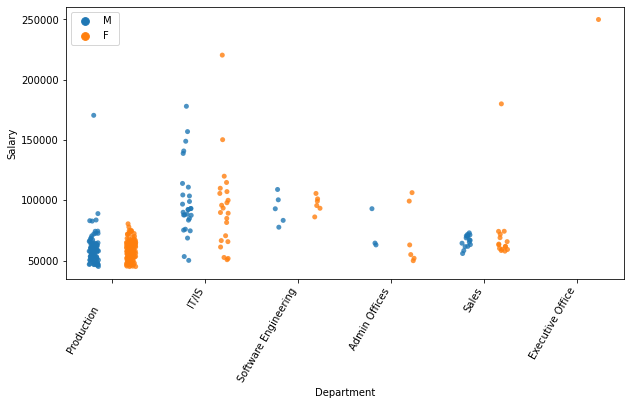

In [ ]:
# PLOT
plt.figure(figsize=(10,5))
bplot=sns.stripplot(y='Salary', x='Department', data=df, jitter=True, dodge=True, marker='o', alpha=0.8, hue='Sex')
bplot.legend(loc='upper left')

plt.xticks(rotation=60, horizontalalignment='right');

This figure shows that Salary of men and women almost have same salary.

(array([197.,  65.,  32.,   7.,   2.,   3.,   3.,   0.,   1.,   1.]),
 array([ 45046. ,  65541.4,  86036.8, 106532.2, 127027.6, 147523. ,
        168018.4, 188513.8, 209009.2, 229504.6, 250000. ]),
 <a list of 10 Patch objects>)

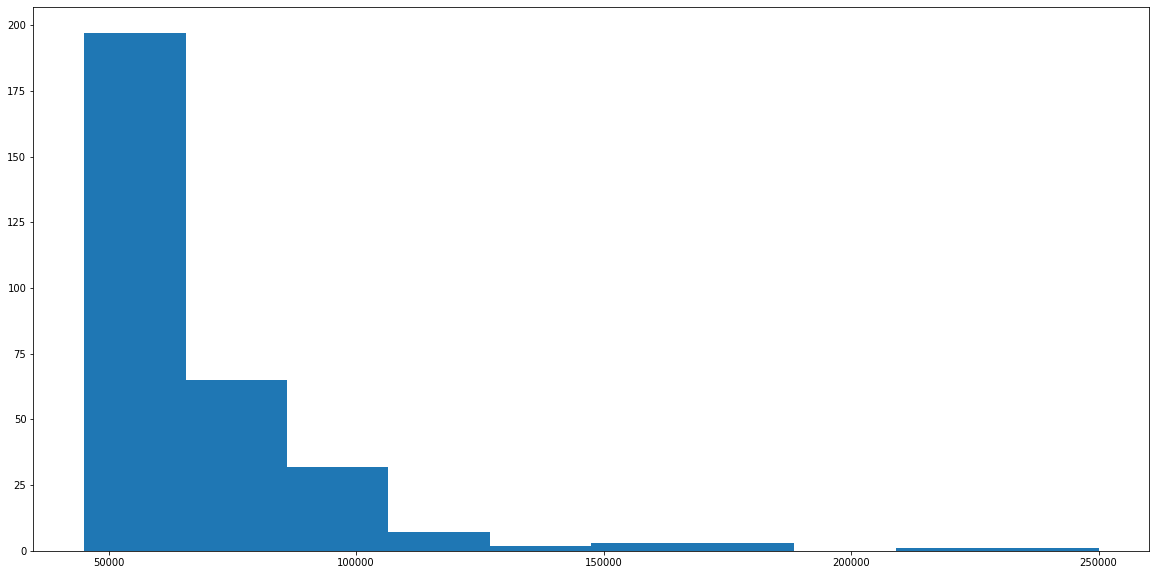

In [ ]:
plt.hist(df['Salary'], bins=10)

Most of the employees have salary between 50000 and 600000.

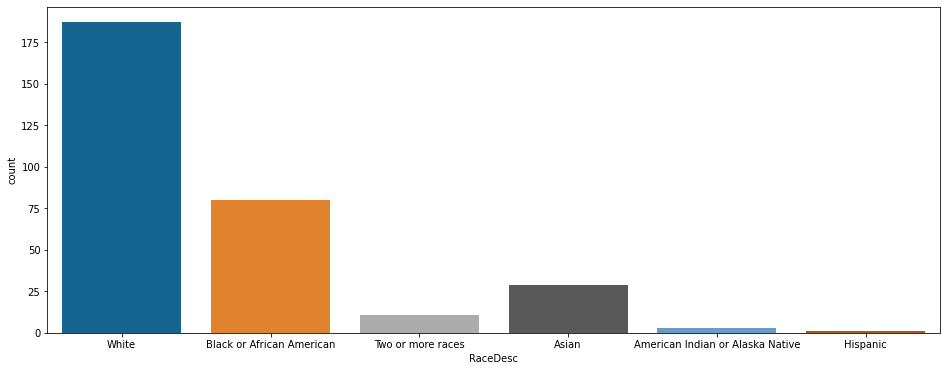

In [ ]:

plt.figure(figsize=(16,6))
sns.countplot(x = "RaceDesc", data=df)

Here we see that the company's diversity is based on gender, we see that the number of females exceeds the number of males, with approximately 30 employees
Most of the employees are US citizens
Most of the employees are white and the main reason is that they are American citizens, and nearly half of the employees are black or Americans

In [ ]:
import plotly.graph_objs as go

def pie_count(data, field="Department", percent_limit=0.5, title="Graph of "):
    
    title += field
    #data[field] = data[field].fillna('NA')
    data = data[field].value_counts().to_frame()

    total = data[field].sum()
    data['percentage'] = 100 * data[field]/total    

    data['count'] =data[field].value_counts().to_frame() 

    percent_limit = percent_limit
    otherdata = data[data['percentage'] < percent_limit] 
    others = otherdata['percentage'].sum()  
    maindata = data[data['percentage'] >= percent_limit]
    
    data = maindata
    other_label = "Others(<" + str(percent_limit) + "% each)"       
    data.loc[other_label] = pd.Series({field:otherdata[field].sum()}) 
    
    labels = data.index.tolist()   
    datavals = data[field].tolist()
    
    trace = go.Pie(labels = labels,
                values = datavals)

    layout = go.Layout(
        title = title,
        height=700
        )
    
    fig = go.Figure(data=[trace], layout=layout)
    fig.show()
    
pie_count(df, 'Sex')

In the given dataset, around 43% employees are Male and 56 % employees are female

Which managers supervise the most in the company ?

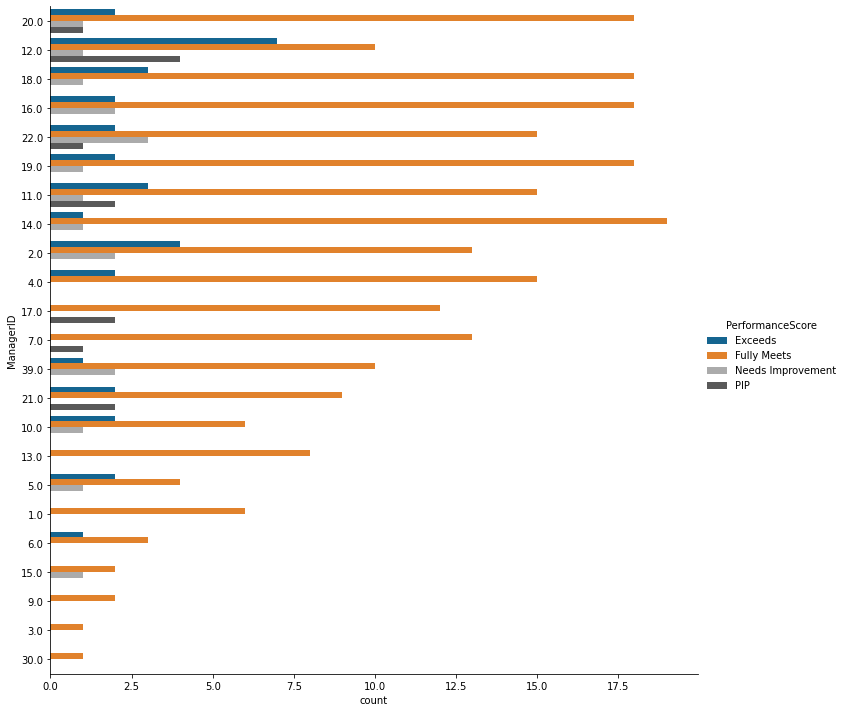

In [ ]:
ManagersIds = df.groupby('ManagerID')['PerformanceScore'].count().sort_values(ascending=False).index
sns.catplot(y='ManagerID', hue='PerformanceScore', kind='count', data=df, order=ManagersIds,  height=10, aspect=1)

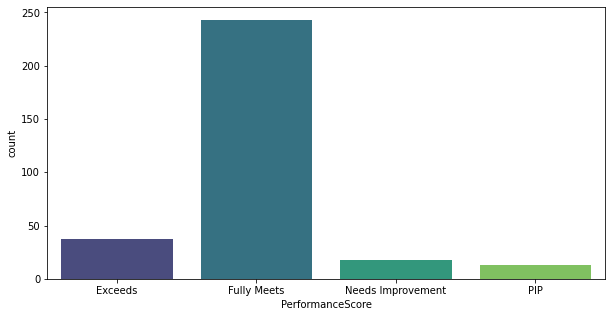

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='PerformanceScore', data=df1, palette='viridis')

Trying to plot all the numerical features in a seaborn pairplot will take us too much time and will be hard to interpret. We can try to see if some variables are linked between each other and then explain their relation with common sense.

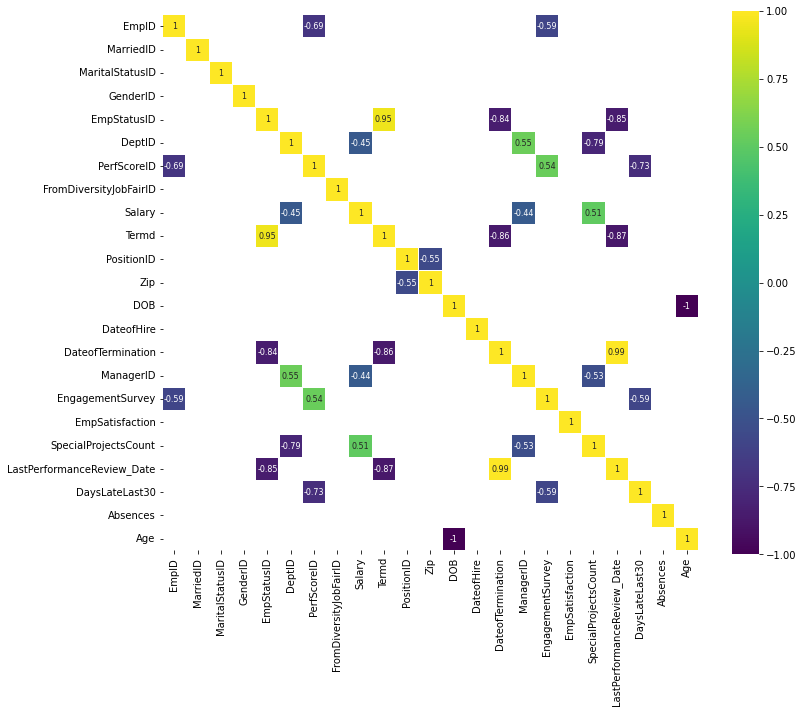

In [ ]:
corr = df.corr() # We already examined SalePrice correlations
# .drop('Salary', axis=1)
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [ ]:
df1.columns

Index(['MarriedID', 'GenderID', 'FromDiversityJobFairID', 'Salary', 'Termd',
       'Position', 'State', 'Zip', 'DOB', 'MaritalDesc', 'CitizenDesc',
       'HispanicLatino', 'RaceDesc', 'DateofHire', 'Department', 'ManagerName',
       'RecruitmentSource', 'PerformanceScore', 'EngagementSurvey',
       'EmpSatisfaction', 'SpecialProjectsCount', 'LastPerformanceReview_Date',
       'DaysLateLast30', 'Absences', 'Age'],
      dtype='object')

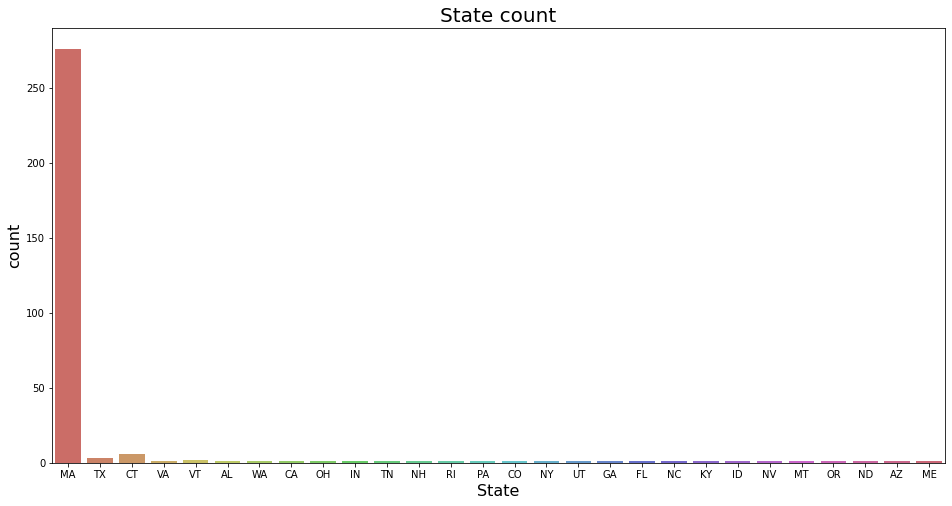

In [ ]:
# To show Different Work rate of the players participating in the FIFA 2019

plt.figure(figsize = (16, 8))
plt.style.use('tableau-colorblind10')

sns.countplot(x = 'State', data = df, palette = 'hls')
plt.title('State count', fontsize = 20)
plt.xlabel('State', fontsize = 16)
plt.ylabel('count', fontsize = 16)
plt.show()

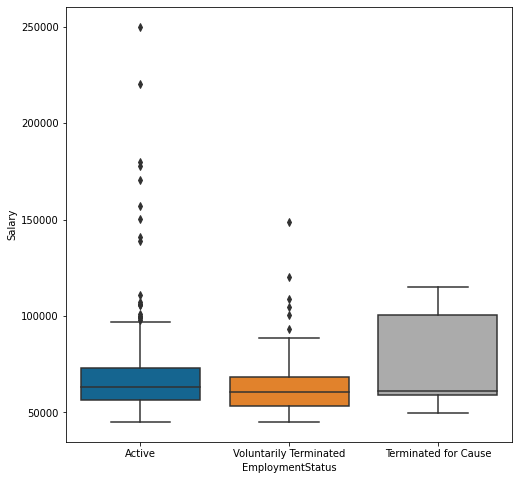

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(y=df["Salary"], x=df["EmploymentStatus"])

In [ ]:
# pie_count(df, 'Marital')

In [ ]:
position= df[['Position','EmpID']].groupby(by=['Position'],as_index=False).count()
position.rename(columns={'Position':'Position','EmpID':'counts'},inplace=True)
position['%']=(position['counts']/position['counts'].sum())*100
position

,Position,counts,%
0,Accountant I,3,0.964630
1,Administrative Assistant,3,0.964630
2,Area Sales Manager,27,8.681672
3,BI Developer,4,1.286174
4,BI Director,1,0.321543
5,CIO,1,0.321543
6,Data Analyst,7,2.250804
7,Data Analyst,1,0.321543
8,Data Architect,1,0.321543
9,Database Administrator,5,1.607717


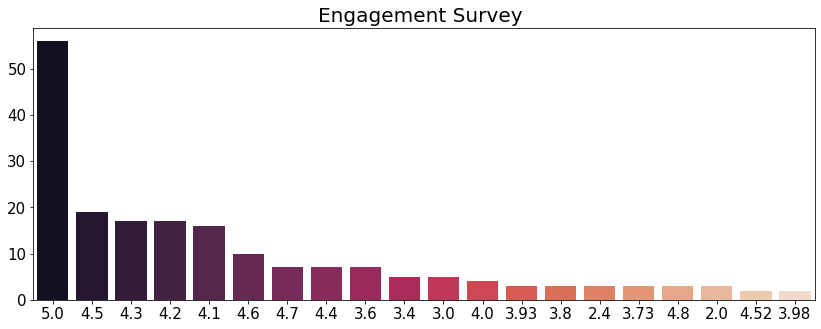

In [ ]:
EngagementSurvey = df['EngagementSurvey'].value_counts().iloc[:20]


plt.figure(figsize=(14,5))
sns.barplot(x = EngagementSurvey.index , y=EngagementSurvey.values , order=EngagementSurvey.index , palette='rocket')

plt.title('Engagement Survey ' , fontsize=20)
plt.xticks(fontsize=15)

plt.yticks(fontsize=15)

plt.show()

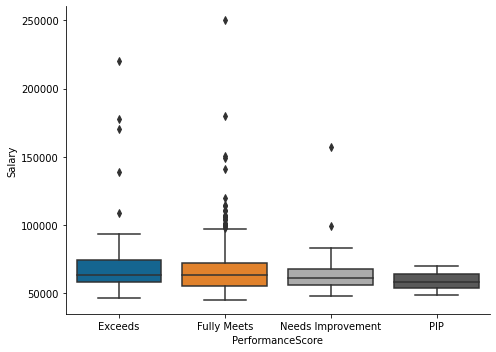

In [ ]:
 sns.catplot(aspect=7/5,x="PerformanceScore", y="Salary", kind='box',data=df)

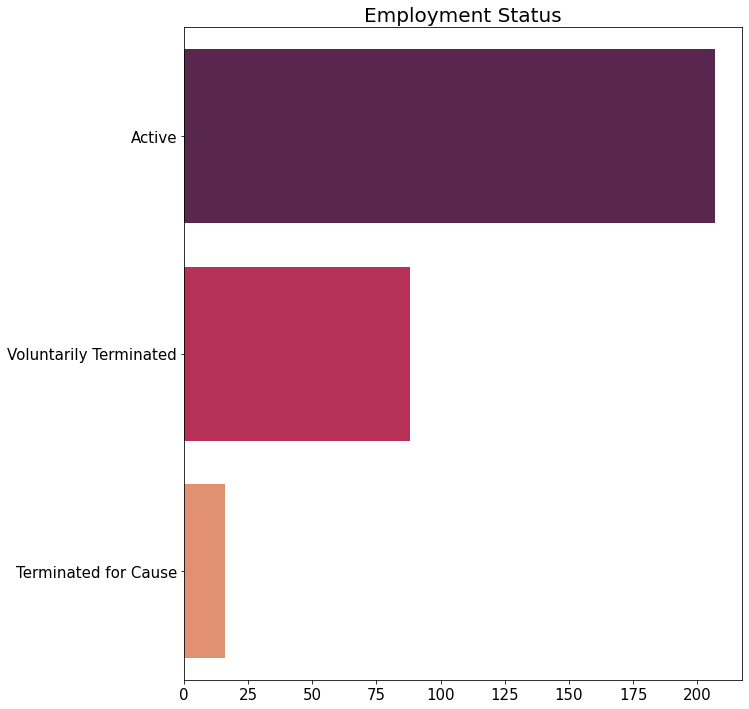

In [ ]:
col = df['EmploymentStatus'].value_counts()
plt.figure(figsize=(10,12))

sns.barplot(x = col.values , y=col.index , order = col.index, palette='rocket')

plt.title('Employment Status' , fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

Active employees are majority in the list compared to terminated and voluntarily termiminated

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



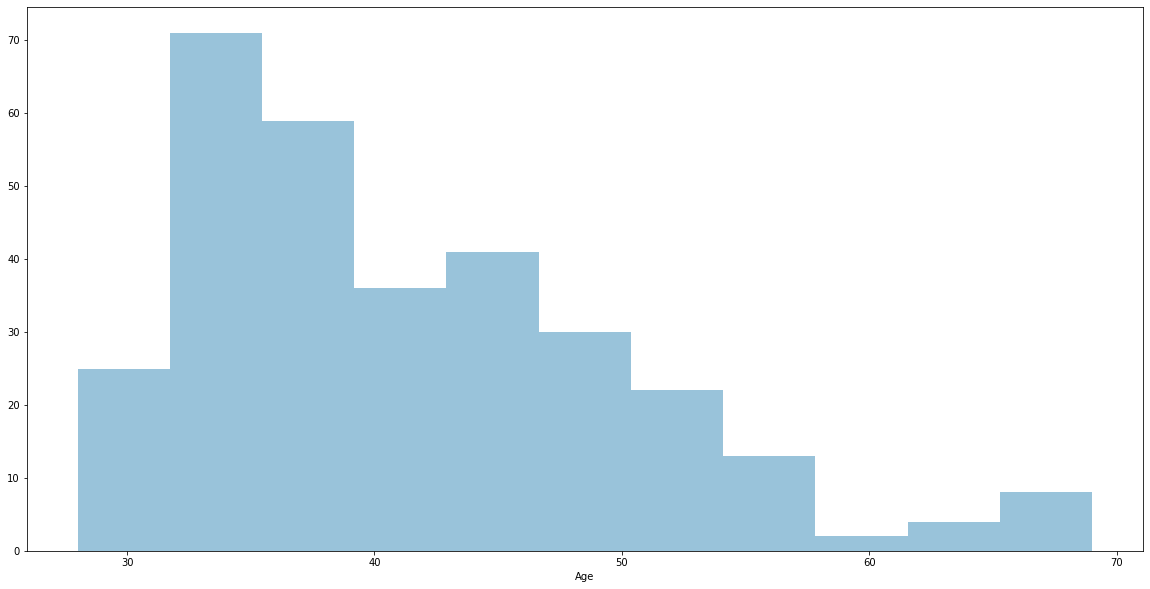

In [ ]:
sns.distplot(a=df['Age'],kde = False);

Most of them have age between 35-40